In [1]:
from base64 import b64encode, b64decode

message = "Many are cold, but few are frozen!"
print ("Original message which could have unprintable characters, but this one doesn't:\n ", message)
print ("message length:", len(message))
print ()

# the base64 library won't work with strings, you need to first convert to a byte array, the encode to base64
encodedBytes = b64encode(message.encode("utf-8"))
print("Base64 encoded string:\n", encodedBytes)
print ("message length:", len(encodedBytes))
print ()

# Note that the output is also a byte array, not a string.  If you want, you can convert it to a string
print ("convert byte array to a string:\n", str(encodedBytes, 'utf-8'))
print() 

# Now decode the base64 back to the original 
decodedBytes =b64decode(encodedBytes)
decodedString = str(decodedBytes, "utf-8")
print("Decode message back to its original form: \n", decodedString)
print ("message length:", len(decodedString))

Original message which could have unprintable characters, but this one doesn't:
  Many are cold, but few are frozen!
message length: 34

Base64 encoded string:
 b'TWFueSBhcmUgY29sZCwgYnV0IGZldyBhcmUgZnJvemVuIQ=='
message length: 48

convert byte array to a string:
 TWFueSBhcmUgY29sZCwgYnV0IGZldyBhcmUgZnJvemVuIQ==

Decode message back to its original form: 
 Many are cold, but few are frozen!
message length: 34


In [2]:
#   Code to demonstrate the inner workings of Base64 conversion
#

# Define our conversion table
B64Table = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/"

# convert the 3 character message to integer representation
message = "Man"

ascii = [message[i] for i in range(len(message))]
print ("These are the 3 ascii characters:\n", ascii)
print ()

data = [ord(message[i]) for i in range(len(message))]
print ("These are the ascii integers of the message:\n", data)
print ()

# Now split the 3 8 bit characters (24 bits) into 4 6-bit characters (24 bits)
# There is probably a much more elegant way to do this...

bits24 = data[0] * 256 * 256 + data[1] * 256 + data[2]
b64int = []
for i in range(4):
    b64int.append(bits24 % 64) 
    bits24 = bits24 >> 6
b64int.reverse()
print ("Here are the 4 6-bit characters:\n", b64int)

# Now look up the characters in the conversion table
b64chr = []
for i in range(4):
    b64chr.append(B64Table[b64int[i]])
print (b64chr)

These are the 3 ascii characters:
 ['M', 'a', 'n']

These are the ascii integers of the message:
 [77, 97, 110]

Here are the 4 6-bit characters:
 [19, 22, 5, 46]
['T', 'W', 'F', 'u']


In [3]:
import random

print("Here is a single sample from a uniform random variable")
print(random.random())
print ()

print("Here is a list of three samples:")
uniSamples = [random.random(), random.random(), random.random()]
print(uniSamples)
print ()

print("Here is a list of three exponential samples:")
expSamples = [random.expovariate(1.0), random.expovariate(1.0), random.expovariate(1.0)]
print(expSamples)

Here is a single sample from a uniform random variable
0.7865432018536687

Here is a list of three samples:
[0.942088326414869, 0.6624284191848503, 0.9050455838241057]

Here is a list of three exponential samples:
[0.7063882400315733, 0.30031915356998223, 5.57270726392832]


[0.1511637878344647, 0.9191249517664021, 0.10519916868687818, 0.3463364796104985, 0.3683017092938987, 0.9821534722904108, 0.6985776076125954, 0.8799202925818531, 0.6486762658299234, 0.35062147605884786]


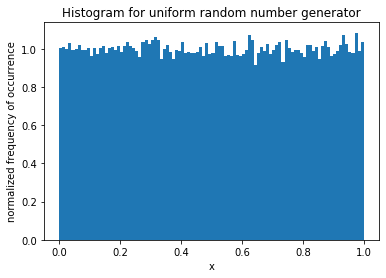

In [9]:
import random
import matplotlib.pyplot as plt

uniSamples = [random.random() for i in range(100000)]
print(uniSamples[0:10])  #Take a look at the first 10
fig, axis = plt.subplots()
axis.hist(uniSamples, bins=100, density=True)
axis.set_title("Histogram for uniform random number generator")
axis.set_xlabel("x")
axis.set_ylabel("normalized frequency of occurrence")
#fig.savefig("UniformHistogram.png")
plt.show()

[8.342117345122208, 10.844597202713025, 10.752948395839393, 8.86850808730729, 6.009731653079216, 11.32538378680925, 10.080079835559, 7.690985081709792, 10.975881267090875, 9.307688088721722]


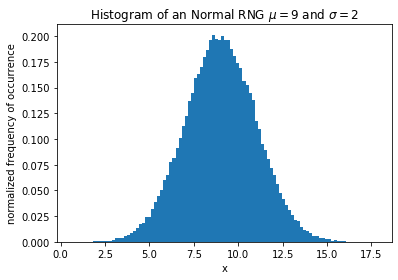

In [11]:
#  Generate a normal Gaussian distribution 
#  (aka: "standard distribution" or "bell-shaped curve")
#

import random
import matplotlib.pyplot as plt

normSamples = [random.normalvariate(9.0, 2.0) for i in range(100000)]
print(normSamples[0:10])  #Take a look at the first 10
fig, axis = plt.subplots()
axis.hist(normSamples, bins=100, density=True)
axis.set_title(r"Histogram of an Normal RNG $\mu = 9$ and $\sigma = 2$")
axis.set_xlabel("x")
axis.set_ylabel("normalized frequency of occurrence")
plt.show()

[26.100092418404234, 15.651593483778342, 29.03417980060689, 27.653712674531214, 26.148128411243878, 19.577519884304856, 81.21352417294815, 28.829807808365853, 1.6648756668909472, 62.50217948856827]


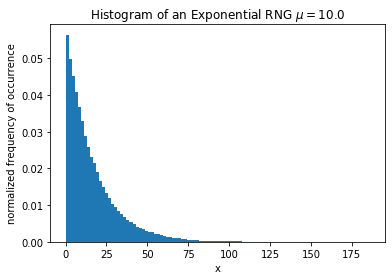

In [13]:
import random
import matplotlib.pyplot as plt

expoSamples = [random.expovariate(0.06) for i in range(100000)]
print(expoSamples[0:10])  #Take a look at the first 10
fig, axis = plt.subplots()
axis.hist(expoSamples, bins=100, density=True)
axis.set_title(r"Histogram of an Exponential RNG $\mu = 10.0$")
axis.set_xlabel("x")
axis.set_ylabel("normalized frequency of occurrence")
plt.show()

In [14]:
import random
import secrets

number = random.SystemRandom().random()
print("secure number is ", number)

print("Secure byte token", secrets.token_bytes(16))

secure number is  0.5756916585976314
Secure byte token b'\xeb\xe6\xed\xba\x00\x0ff\xc1:\x1c\xe2\x885\xcd\x06\xe6'


3.04


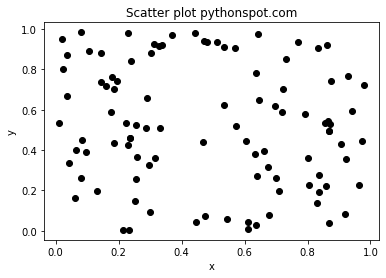

In [15]:
#   A "not very good" test of randomness, but it gives you an intuitive feel for the data.
#   There are much better statistical tests for randomness than this.  But this makes a pretty chart!
#

from random import *
from math import sqrt
import matplotlib.pyplot as plt

inside=0
n=100
for i in range(0,n):
	x=random()
	y=random()
	plt.plot(x,y,'o',color="black")
	if sqrt(x*x+y*y)<=1:
		inside+=1
pi=4*inside/n
print (pi)

plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Pi estimated to be  3.1492


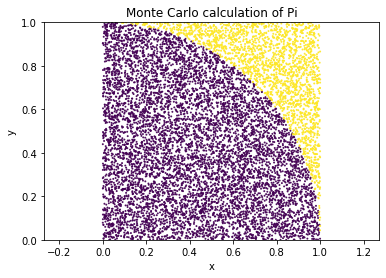

In [16]:
from random import *
from math import sqrt
import matplotlib.pyplot as plt

inside=0
n=10000

x = [random() for i in range(n)]
y = [random() for i in range(n)]
colors = []
for i in range(0,n):
	if sqrt(x[i]*x[i]+y[i]*y[i])<=1:
		inside+=1
		colors.append(1)
	else:
		colors.append(4)
        
pi=4*inside/n
print ("Pi estimated to be ", pi)

plt.figure()
plt.scatter(x, y, s=1, c=colors, alpha=0.85)
plt.axis('equal')
plt.axis([0.0, 1.0, 0.0, 1.0])
plt.title('Monte Carlo calculation of Pi')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
#  Simple demo program to perform stream encryption and decryption
#  

from base64 import b64encode, b64decode
from itertools import cycle

def xor_crypt_string(data, key = 'awesomepassword', encode = False, decode = False):
   
   if decode:
      data = str(b64decode(data), "utf-8")  # decode from base64 to ciphertext  
   
   # This single line of code performs both streaming encryption and decryption
   # because the XOR function is its own inverse. 

   # Python3 zip iterator: zip('ABCD', 'xy') --> Ax By
   # Python3 cycle iterator: cycle('ABCD') --> A B C D A B C D A B C D ... 

   xored = ''.join(chr(ord(x) ^ ord(y)) for (x,y) in zip(data, cycle(key)))  # encrypt/decrypt 
   if encode:
      return xored, b64encode(xored.encode("utf-8").strip())  # return encrypted ciphertext and base64 version
   return xored  # return decrypted plaintext


secret_data = "Did you know that XOR is its own inverse.  Of course you did!"
print ("Original Plaintext: ", secret_data)
print ()

cipherText, encodedCipherText = xor_crypt_string(secret_data, encode = True)
print ("CipherText with unprintable characters: ", cipherText)
print ("CipherText in base64: ", encodedCipherText)
print ("See.... That's why we need base64!\n")

plainText = xor_crypt_string(encodedCipherText, decode = True)
print ("Decrypted PlainText: ", plainText)

Original Plaintext:  Did you know that XOR is its own inverse.  Of course you did!

CipherText with unprintable characters:  %SP
 O E+ ?ESRE ]WO=A
 PW @
CipherText in base64:  b'JR4BUxYCEFAKHRwATwYMAANFKyA/RRkSUxoDHFILFhlFGgEbAAISFl1XTz0CQRQKBh0eAFAYHAZXCxsAQA=='
See.... That's why we need base64!

Decrypted PlainText:  Did you know that XOR is its own inverse.  Of course you did!


In [18]:
#  A very simple block encryption algorithm
#

import binascii

def pad(str):
    #  this block cipher uses 8 byte blocks.  If necessary, pad with hex 0x80 to fill out the block.
    padLength = 0 if (len(str) % 8) == 0 else 8 - (len(str) % 8) 
    return str + "".join(chr(128) for i in range (padLength))

def removePad(str):
    index = str.find(chr(128))
    return str if index == -1 else str[:index]

def printBlocks(comment, blocks):
    print (comment)
    print ('/nDisregard extra utf-8 byte when high-order bit is set.\n')
    for block in blocks: print (binascii.hexlify(block.encode('utf-8')))
    print ()

def makeBlocks(data):
    # break the data into 8-byte blocks
    blocks = [''.join(x) for x in zip(*[list(data[z::8]) for z in range(8)])]
    return blocks
    
def xorBlock(block, key):
    # XOR the block with the key
    return ''.join(chr(ord(x) ^ ord(y)) for (x,y) in zip(block, key))

def swapBlock(block,key):
    # SWAP data bytes if byte in key is odd
    begin = 0
    end = 7
    blocklist = list(block)  # strings are immutable, so turn into a list
    for c in key:
        if (ord(c) % 2):
            blocklist[begin], blocklist[end] = blocklist[end], blocklist[begin]
            end -= 1
        begin += 1
        if (begin >= end): break
    return "".join(blocklist)
    
    
def blockEncrypt(data, key):
    # pad the data out to a multiple of 8 bytes.
    data = pad(data)
    
    # break the padded data into 8-byte blocks
    blocks = makeBlocks(data)
    print ("plaintext broken into blocks; note padding!\n", blocks)
    print ()
    printBlocks("block data in hex", blocks)

    ciphertext = ""
    print ("Encrypted blocks:\n")
    for block in blocks:

        # XOR the key with the block
        block = xorBlock(block, key)

        # SWAP if byte in key is odd
        block = swapBlock(block, key)
        print (binascii.hexlify(block.encode('utf-8')))
        ciphertext += block
    print ()
    return ciphertext

def blockDecrypt(data, key):
    # break the ciphertext into 8-byte blocks
    blocks = makeBlocks(data)
    
    plaintext = ""
    for block in blocks:
        # reverse the order of XOR and SWAP performed by the encryption
        # SWAP if byte in key is odd
        block = swapBlock(block, key)
        # XOR the key with the block
        block = xorBlock(block, key)
        print (block)
        plaintext += block
        
    # remove the padding
    return removePad(plaintext)

###### MAIN

key = "MySecret"  # must be 8 bytes, the size of a block. Shared secret key is used for both encryption and decryption.
clearText = "Block ciphers are generally more robust and harder to crack than stream ciphers.  So there."
print ("This is the original text:\n", clearText)
print ()

# encrypt
cipherText = blockEncrypt(clearText, key)

print ("Ciphertext (possibly has unprintable characters):")
print (cipherText)
print ()

# decrypt
plainText = blockDecrypt(cipherText, key)
print ("\nplaintext:", plainText)

This is the original text:
 Block ciphers are generally more robust and harder to crack than stream ciphers.  So there.

plaintext broken into blocks; note padding!
 ['Block ci', 'phers ar', 'e genera', 'lly more', ' robust ', 'and hard', 'er to cr', 'ack than', ' stream ', 'ciphers.', '  So the', 're.\x80\x80\x80\x80\x80']

block data in hex
/nDisregard extra utf-8 byte when high-order bit is set.

b'426c6f636b206369'
b'7068657273206172'
b'652067656e657261'
b'6c6c79206d6f7265'
b'20726f6275737420'
b'616e642068617264'
b'657220746f206372'
b'61636b207468616e'
b'2073747265616d20'
b'636970686572732e'
b'2020536f20746865'
b'72652ec280c280c280c280c280'

Encrypted blocks:

b'1d065208063c150f'
b'060452101736113d'
b'1517170d00345928'
b'11171d0e452a1521'
b'54110116073c0b6d'
b'1017130b4537172c'
b'0606520c11730b28'
b'1a041a1745381a2c'
b'5408130617270a6d'
b'5a1600060d23102e'
b'110d06430a00596d'
b'c3b4c3a5c3b2c3a3c3a57d1c3f'

Ciphertext (possibly has unprintable characters):
 4Y(E*!T<mE7

In [51]:
#create a plaintext file for this exercise

with open("lab2Plain.txt", "w") as fd:
    fd.write("This is a really cool file!\n")
    fd.write("It has my name in it:  YiboXu\n")

In [52]:
#  code to encrypt with AES-256
#

import base64
import hashlib
from Crypto import Random
from Crypto.Hash import SHA256
from Crypto.Cipher import AES

# define a class structure to define encrypt/decrypt methods

class AESCipher(object):

    # initialize the class instance and creating a key from user's password
    def __init__(self, passPhrase): 
        self.bs = AES.block_size
        print ("block size", self.bs)
        # get a 256 bit key by hashing your password
        self.key = hashlib.sha256(passPhrase.encode()).digest()
        print ("256 bit key derived from password:\n", self.key)
        print ()

    # method to perform AES encryption
    def encrypt(self, plainText):
        # the plaintext length must be a multiple of blocksize
        # Pad the data if necessary
        padded = self._pad(plainText) 
        # Each time we encrypt we will need a random initialization vector
        iv = Random.new().read(AES.block_size)
        # Instantiate a cipher object from the AES library
        # Give it the key, set it to cipher-block-chaining mode, and
        # give it the initialization vector
        cipherObject = AES.new(self.key, AES.MODE_CBC, iv)
        # Encrypt the data/padding after converting to byte array
        encrypted = cipherObject.encrypt(padded.encode('utf-8'))
        # concatenate the iv and the ciphertext and convert to base64                                 
        encoded = base64.b64encode(iv + encrypted)
        return encoded

    # method to perform AES decryption
    def decrypt(self, cipherText):
        # decode the base64 string which contains the IV and ciphertext
        encrypted = base64.b64decode(cipherText) 
        # strip off the initialization vector
        iv = encrypted[:AES.block_size]
        # instantiate an AES cipher object with same parameters as before
        cipherObject = AES.new(self.key, AES.MODE_CBC, iv)
        # decrypt the string, strip off the padding and return the plaintext
        return self._unpad(cipherObject.decrypt(encrypted[AES.block_size:]))

    # method to pad a string to an even multiple of block size
    # the pad character is a hex digit indicating the length of the padding
    def _pad(self, s):
        return s + (self.bs - len(s) % self.bs) * chr(self.bs - len(s) % self.bs)

    # method to strip the padding
    @staticmethod
    def _unpad(s):
        return s[:-ord(s[len(s)-1:])]
    
#
#  The main routine
#

# read the plaintext file as one block of data 
# side note:  large files should be read in a loop

with open("lab2Plain.txt", "r") as fd:
    plaintext = fd.read()

passPhrase = "Hello Kitty!"
myCipher = AESCipher(passPhrase)
cipherText = myCipher.encrypt(plaintext)
print ("The base64 encoding of the IV and cipherText:\n", cipherText)
print ()
    
#### write the ciphertext file
with open("lab2Cipher.txt", "wb") as fd:  # note the use of "wb"
    fd.write(cipherText)

block size 16
256 bit key derived from password:
 b'\xe2\xe3\x05\r\x05~\x051\x93\xcd\xa1\xc4\xffF\x12F\xf3:$\xca\xb1n\xb6\x984z\xd94\xf5\xb0\xd3\xda'

The base64 encoding of the IV and cipherText:
 b'DPrhRqJNdLJhbsWRwUwvfuoM9p6ovDlqRpC4R0g2x5kLyqAurjrTzfMz49v+JFfYw0DFNjwT2a7gePsNeOo/L8fbH5kscmoMtQnEylC6OZE='



In [2]:
#  Your assignment
#

import base64
import hashlib
from Crypto import Random
from Crypto.Hash import SHA256
from Crypto.Cipher import AES

# define a class structure to define encrypt/decrypt methods

class AESCipher(object):

    # initialize the class instance and creating a key from user's password
    def __init__(self, passPhrase): 
        self.bs = AES.block_size
        print ("block size", self.bs)
        # get a 256 bit key by hashing your password
        self.key = hashlib.sha256(passPhrase.encode()).digest()
        print ("256 bit key derived from password:\n", self.key)
        print ()

    # method to perform AES encryption
    def encrypt(self, plainText):
        # the plaintext length must be a multiple of blocksize
        # Pad the data if necessary
        padded = self._pad(plainText) 
        # Each time we encrypt we will need a random initialization vector
        iv = Random.new().read(AES.block_size)
        # Instantiate a cipher object from the AES library
        # Give it the key, set it to cipher-block-chaining mode, and
        # give it the initialization vector
        cipherObject = AES.new(self.key, AES.MODE_CBC, iv)
        # Encrypt the data/padding after converting to byte array
        encrypted = cipherObject.encrypt(padded.encode('utf-8'))
        # concatenate the iv and the ciphertext and convert to base64                                 
        encoded = base64.b64encode(iv + encrypted)
        return encoded

    # method to perform AES decryption
    def decrypt(self, cipherText):
        # decode the base64 string which contains the IV and ciphertext
        encrypted = base64.b64decode(cipherText) 
        # strip off the initialization vector
        iv = encrypted[:AES.block_size]
        # instantiate an AES cipher object with same parameters as before
        cipherObject = AES.new(self.key, AES.MODE_CBC, iv)
        # decrypt the string, strip off the padding and return the plaintext
        return self._unpad(cipherObject.decrypt(encrypted[AES.block_size:]))

    # method to pad a string to an even multiple of block size
    # the pad character is a hex digit indicating the length of the padding
    def _pad(self, s):
        return s + (self.bs - len(s) % self.bs) * chr(self.bs - len(s) % self.bs)

    # method to strip the padding
    @staticmethod
    def _unpad(s):
        return s[:-ord(s[len(s)-1:])]
    
#
#  The main routine
#

# read the ciphertext file as one block of data 

#### insert your code here
with open("lab2Cipher.txt","r") as fd:
    cipherText = fd.read()

passPhrase = "Hello Kitty!"
myCipher = AESCipher(passPhrase)

# decrypt the file

plainText = myCipher.decrypt(cipherText)
plainText = str(plainText,"utf-8")
print ("The plaintext:\n",plainText)



#with open("lab2Plain1.txt", "wb") as fd:  # note the use of "wb"
    #fd.write(plainText)


block size 16
256 bit key derived from password:
 b'\xe2\xe3\x05\r\x05~\x051\x93\xcd\xa1\xc4\xffF\x12F\xf3:$\xca\xb1n\xb6\x984z\xd94\xf5\xb0\xd3\xda'

The plaintext:
 This is a really cool file!
It has my name in it:  Yibo Xu

